# Required Library

In [101]:
import tensorflow as tf
import matplotlib.pyplot as plt
import os
import cv2
import numpy as np
from tensorflow.keras.layers import Dense, Flatten, Dropout , BatchNormalization
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
import tkinter as tk 
from tkinter import filedialog

# Load dataset

## Hand Digits Dataset

In [102]:
data = tf.keras.datasets.mnist

# Train and  test data

In [103]:
(x_train, y_train) , (x_test, y_test)  = data.load_data()

* This specific line of code is inherent to the MNIST dataset when using libraries like Keras or TensorFlow

* `x_train, y_train, x_test, y_test = mnist.load_data()` is `not working`

# Pre-proccessing data

## Normalization

In [104]:
x_train = tf.keras.utils.normalize(x_train, axis = 1)
x_test = tf.keras.utils.normalize(x_test ,  axis = 1)

# Neural Network model

### Model Building

In [105]:
model = Sequential()

model.add(Flatten(input_shape = (28,28)))
model.add(Dense(256, activation="relu"))
model.add(Dropout(0.3))
BatchNormalization()
model.add(Dense(128, activation = "relu"))
model.add(Dropout(0.2))
BatchNormalization()
model.add(Dense(64,activation="relu"))
model.add(Dropout(0.2))
BatchNormalization()
model.add(Dense(32, activation="relu"))
model.add(Dense(10, activation = "softmax"))

model.compile(optimizer = Adam(learning_rate=0.001),loss = "sparse_categorical_crossentropy",metrics =['accuracy'])



### Train the model

In [106]:
model.fit(x_train,y_train, epochs=4)

Epoch 1/4
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.7901 - loss: 0.6571
Epoch 2/4
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9501 - loss: 0.1759
Epoch 3/4
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9603 - loss: 0.1345
Epoch 4/4
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9666 - loss: 0.1165


# save the model

In [107]:
model.save("handDigit.keras")

# Evaluate model

In [108]:
loss , accuracy = model.evaluate(x_test,y_test)


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9721 - loss: 0.0999


# Sample images

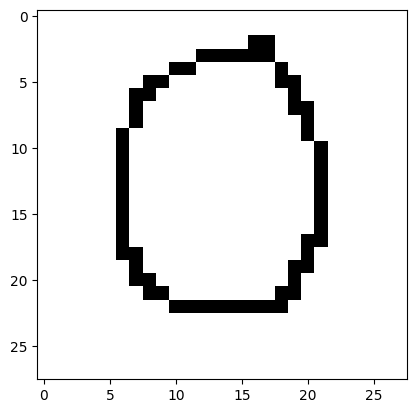

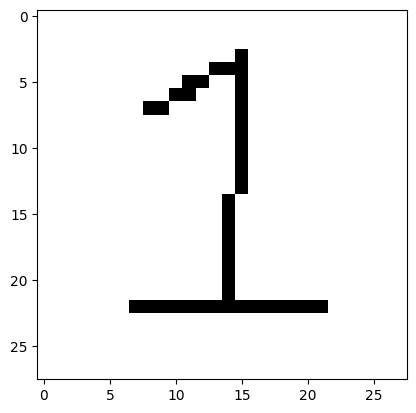

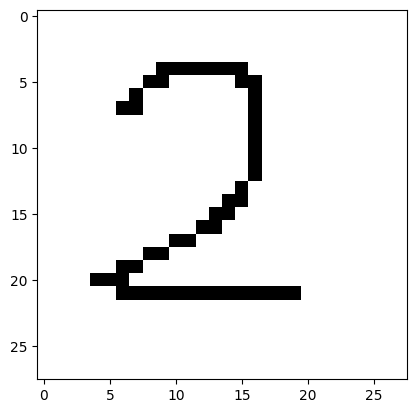

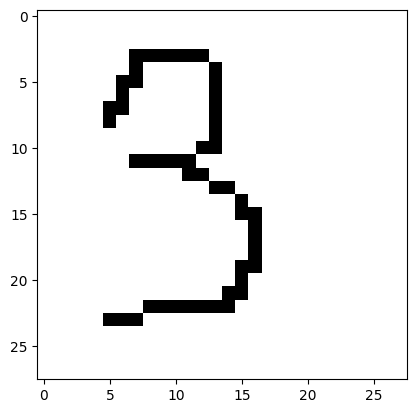

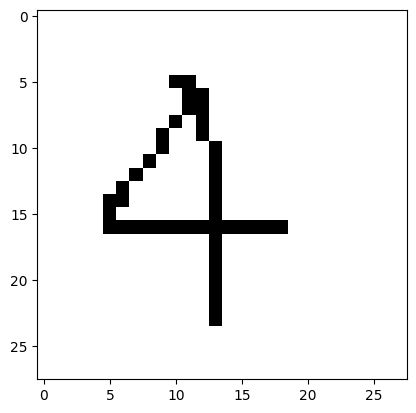

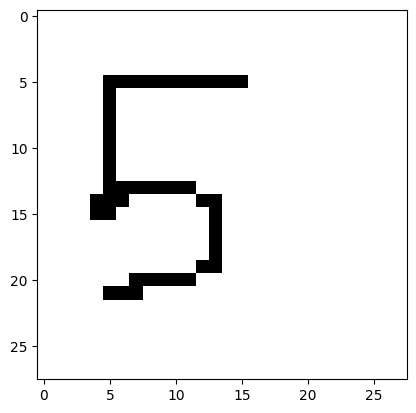

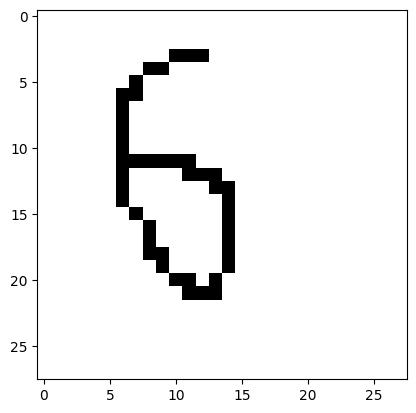

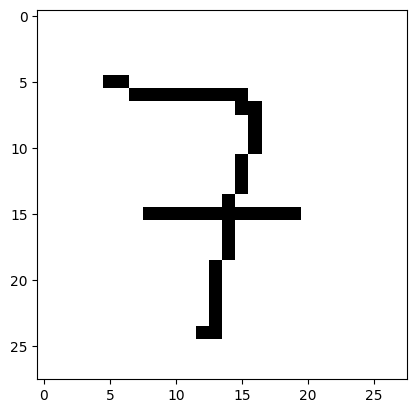

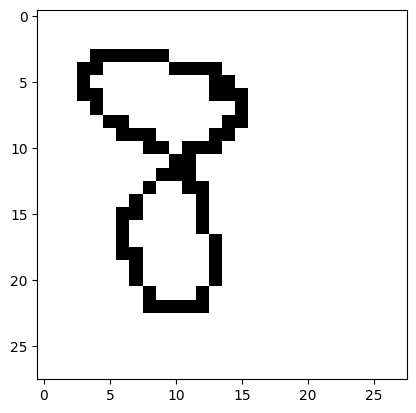

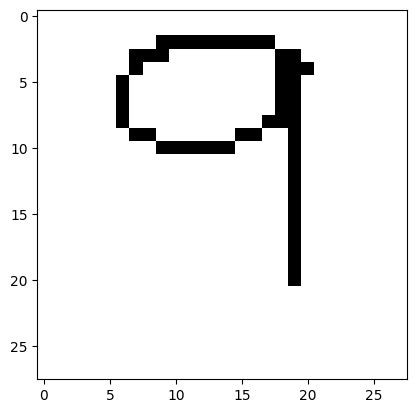

In [109]:
for i in range(0,10):

    image = cv2.imread(f"C:/Users/Induwara Dilshan/Desktop/python vs code/Aprail_projcet/June_machine_ML_project/images/{i}.png")
    plt.imshow(image)
    plt.show()

# Test the model for hand written digits

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step
This image is most probabaly : 0


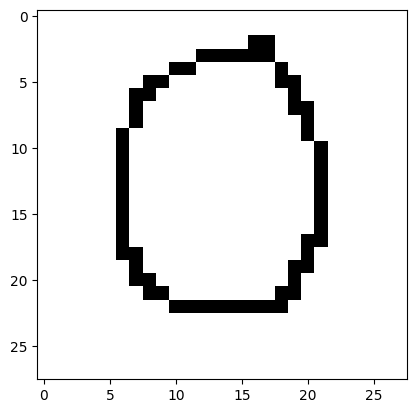

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
This image is most probabaly : 1


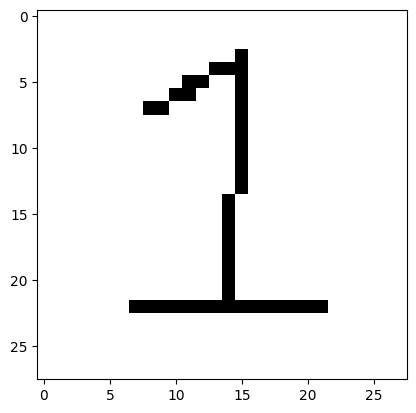

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step
This image is most probabaly : 2


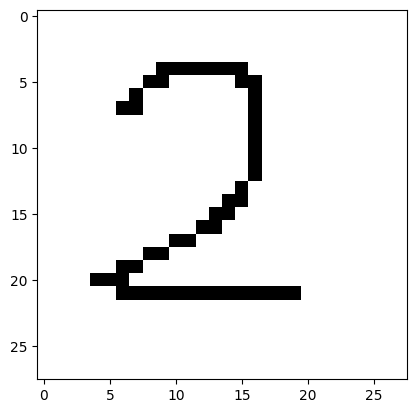

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
This image is most probabaly : 3


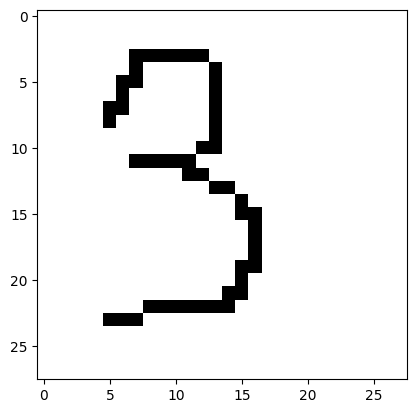

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
This image is most probabaly : 8


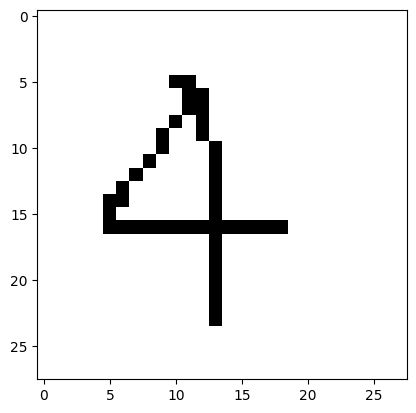

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
This image is most probabaly : 2


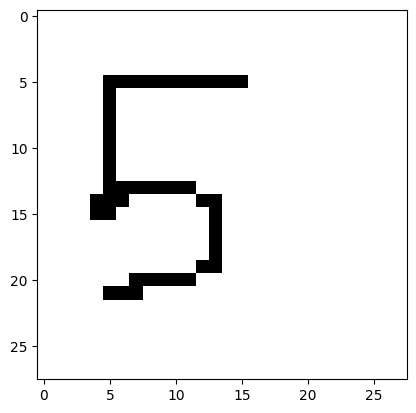

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step
This image is most probabaly : 6


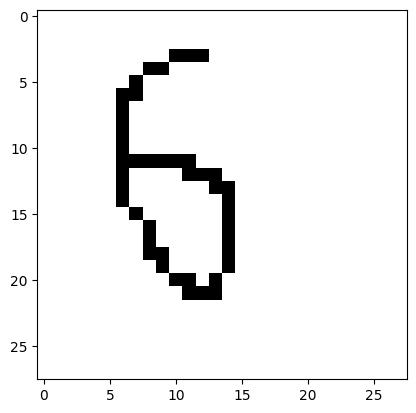

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
This image is most probabaly : 7


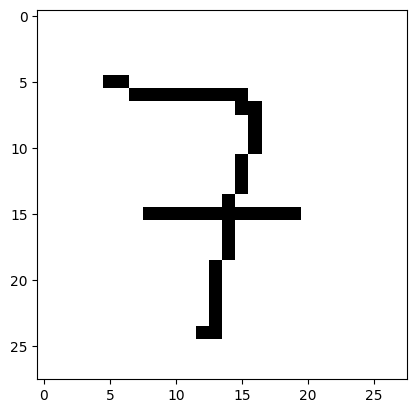

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
This image is most probabaly : 3


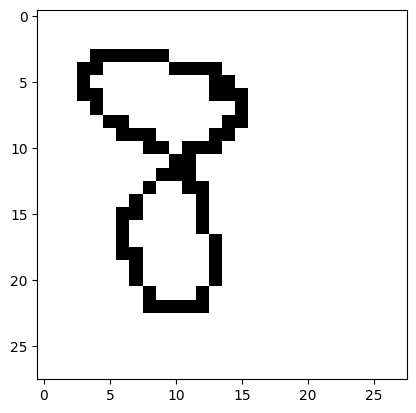

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
This image is most probabaly : 6


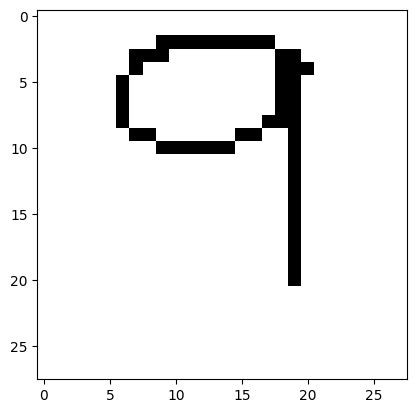

In [110]:
for i in range(10):
    
    image_number = i

    path = os.path.isfile(f"C:/Users/Induwara Dilshan/Desktop/python vs code/Aprail_projcet/June_machine_ML_project/images/{image_number}.png")
    if path == True:
        img = cv2.imread(f"C:/Users/Induwara Dilshan/Desktop/python vs code/Aprail_projcet/June_machine_ML_project/images/{image_number}.png")[:,:,0]
        img = np.invert(np.array([img])) # changing 
        prediction = model.predict(img) # predict using the model
        print(f"This image is most probabaly : {np.argmax(prediction)}") # we can get index of the maximum value from prediction output
        plt.imshow(img[0], cmap=plt.cm.binary)

        plt.show()